# Formula

From known system of linear equation, it will try to convert into augmented matrix form: 
$$[A|b]$$

Then, the goal is to make the matrix AA into an upper triangular form:

$$
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} & b_1 \\
0 & a_{22}' & \cdots & a_{2n}' & b_2' \\
0 & 0 & \cdots & a_{3n}' & b_3' \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \cdots & a_{nn}' & b_n'
\end{bmatrix}
$$

In [19]:
# Install necessary library
import numpy as np
from ipywidgets import VBox, HBox, IntText, Button, Output, RadioButtons

---
# Manual

In [23]:
def solve_manually(coefficients, constants):
    n = len(constants)
    for i in range(n):
        for j in range(i + 1, n):
            factor = coefficients[j, i] / coefficients[i, i]
            coefficients[j, i:] -= factor * coefficients[i, i:]
            constants[j] -= factor * constants[i]
    
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (constants[i] - np.dot(coefficients[i, i + 1:], x[i + 1:])) / coefficients[i, i]
    return x


---
# Easy way
Use `numpy.linalg.solve()` function to easily find the solution

In [25]:
def solve_with_np_linalg_solve(coefficients, constants):
    A = np.array([[coeff.value for coeff in row] for row in coefficients])
    B = np.array([const.value for const in constants])
            
    return np.linalg.solve(A, B)

---
# Testing

In [26]:
output = Output()

def create_flexible_linear_system_input():
    size_input = IntText(value=0, description="Matrix size:")
    generate_button = Button(description="Generate Form", button_style='info')
    solve_button = Button(description="Solve", button_style='success', disabled=True)
    method_selection = RadioButtons(options=['Manual', 'numpy.linalg.solve()'], description='Select method')
    matrix_area = VBox()
    
    def generate_form(_):
        n = size_input.value
        
        coefficients = [[IntText(value=0, description=f"a{i+1}{j+1}") for j in range(n)] for i in range(n)]
        constants = [IntText(value=0, description=f"b{i+1}") for i in range(n)]
        
        rows = [HBox(row + [constants[i]]) for i, row in enumerate(coefficients)]
        form = VBox(rows)
        
        solve_button.coefficients = coefficients
        solve_button.constants = constants
        solve_button.disabled = False
        
        matrix_area.children = [form]
        with output:
            output.clear_output()
    
    def solve_linear_system(_):
        coefficients = solve_button.coefficients
        constants = solve_button.constants
        
        solution = None
        
        with output:
            output.clear_output()
            try:
                if method_selection.value == 'Manual':
                    solution = solve_manually(coefficients, constants)
                elif method_selection.value == 'numpy.linalg.solve()':
                    solution = solve_with_np_linalg_solve(coefficients, constants)
                    
                print("Solution:")
                for i, x in enumerate(solution, start=1):
                    print(f"x{i} = {x}")
            except Exception as e:
                print(f"Error: {e}")
        
                
    
    generate_button.on_click(generate_form)
    solve_button.on_click(solve_linear_system)
    
    layout = VBox([
        size_input,
        generate_button,
        matrix_area,
        method_selection,
        solve_button,
        output
    ])
    return layout

create_flexible_linear_system_input()

---
# Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Coefficients of the linear equations
A = np.array([[2, 1, -3],
              [1, 3, 2],
              [3, -2, 1]])

# Constants on the right-hand side
B = np.array([9, 11, 6])

# Solving for X using np.linalg.solve()
X = np.linalg.solve(A, B)
x, y, z = X
print(f"Solution: x = {x}, y = {y}, z = {z}")

Solution: x = 3.5384615384615383, y = 2.3846153846153846, z = 0.1538461538461539


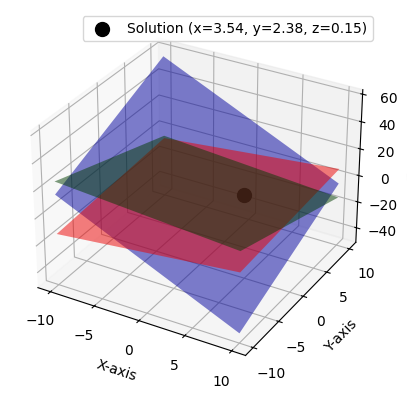

In [38]:
# Creating the figure for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the function for each plane
def plane_1(x, y):
    return (9 - 2*x - y) / -3

def plane_2(x, y):
    return (11 - x - 3*y) / 2

def plane_3(x, y):
    return (6 - 3*x + 2*y)

# Generate a grid for x and y
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)

# Plotting the planes
ax.plot_surface(x_grid, y_grid, plane_1(x_grid, y_grid), alpha=0.5, rstride=100, cstride=100, color='r')
ax.plot_surface(x_grid, y_grid, plane_2(x_grid, y_grid), alpha=0.5, rstride=100, cstride=100, color='g')
ax.plot_surface(x_grid, y_grid, plane_3(x_grid, y_grid), alpha=0.5, rstride=100, cstride=100, color='b')

# Plot the point of intersection (solution)
ax.scatter(x, y, z, color='k', s=100, label=f"Solution (x={x:.2f}, y={y:.2f}, z={z:.2f})")

# Labeling the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Display the plot
ax.legend()
plt.show()
